In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/sample_data/mushrooms.csv')

In [3]:
X = df.drop('class',axis=1)

In [4]:
X = pd.get_dummies(X,drop_first=True)

In [5]:
y = df['class']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

In [9]:
from sklearn.model_selection  import GridSearchCV

In [10]:
param_grid = {'n_estimators':[50,100],
              'learning_rate':[0.1,0.05,0.02],
              'max_depth':[3,4,5]}

In [11]:
model = GradientBoostingClassifier()

In [12]:
grid = GridSearchCV(estimator=model,param_grid=param_grid,cv=3)

In [13]:
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.02],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

from sklearn.metrics import classification_report,confusion_matrix

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
pred = grid.predict(X_test)

In [16]:
grid.best_estimator_

GradientBoostingClassifier(n_estimators=50)

In [17]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [18]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       444
           p       1.00      1.00      1.00       369

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [19]:
confusion_matrix(y_test,pred)

array([[444,   0],
       [  1, 368]])

In [20]:
grid.best_estimator_.feature_importances_

array([1.71990251e-04, 1.28189763e-16, 0.00000000e+00, 0.00000000e+00,
       9.88423981e-17, 1.68661908e-03, 4.84178363e-16, 4.52269251e-16,
       0.00000000e+00, 0.00000000e+00, 1.49699068e-16, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.08904474e-17,
       2.44684069e-03, 5.46547153e-02, 1.30525988e-04, 1.76351744e-02,
       2.07370954e-02, 2.32290635e-04, 6.15607813e-01, 9.28195823e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.27494948e-02,
       1.12089836e-02, 0.00000000e+00, 2.01397089e-17, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.73997615e-17,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.85176365e-04, 4.36930144e-04, 1.28925756e-01, 0.00000000e+00,
       1.21376563e-02, 2.95999592e-04, 0.00000000e+00, 0.00000000e+00,
       9.90406460e-06, 0.00000000e+00, 5.38882815e-02, 9.84023830e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [21]:
feat_import = pd.DataFrame(grid.best_estimator_.feature_importances_,index=X_train.columns,columns=['Importance'])

In [22]:
feat_import

,Importance
cap-shape_c,1.719903e-04
cap-shape_f,1.281898e-16
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,9.884240e-17
...,...
habitat_l,0.000000e+00
habitat_m,0.000000e+00
habitat_p,0.000000e+00
habitat_u,0.000000e+00


In [27]:
imp_feat = feat_import[feat_import['Importance']>0.0005]

In [29]:
imp_feat = imp_feat.sort_values('Importance',ascending=False)

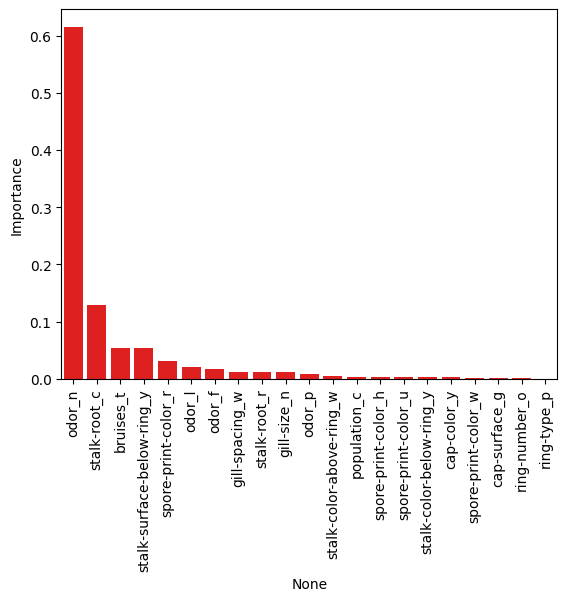

In [32]:
sns.barplot(x=imp_feat.index,
            y='Importance',
            data=imp_feat,
            color='red')
plt.xticks(rotation = 90);